In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import pandas as pd

In [134]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    
    if hist.sum() != 0:
        hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):
    colors = []
    for (percent, color) in zip(hist, centroids):
        color = tuple(color.astype("uint16"))
        colors.append((color, percent))
    return colors

def image_color_cluster(image_path, k=4, skip_ranges=None):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters=k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    colors = plot_colors(hist, clt.cluster_centers_)
    
    if skip_ranges is not None:
        filtered_colors = [color for color in colors if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
        return hist, filtered_colors
    else:
        return hist, colors

In [135]:
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
hist, filtered_colors = image_color_cluster(image_path, k=4, skip_ranges=[(200, 255), (200, 255), (200, 255)])

In [136]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    df = pd.DataFrame(zip(df_rgb, df_percent), columns = ['c_code','occurence'])
    return df

In [144]:
df_color = color_to_df(filtered_colors)
df_color

,c_code,occurence
0,"(2, 174, 242)",0.313758
1,"(77, 126, 182)",0.346241
2,"(5, 110, 187)",0.140549


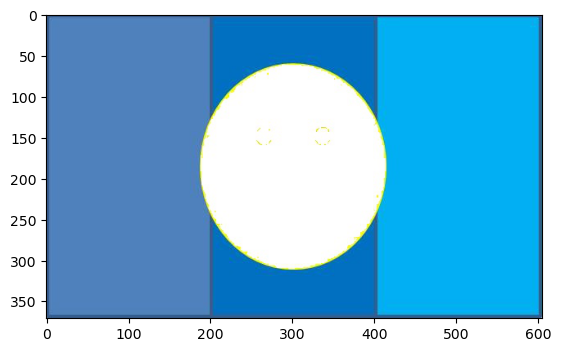

In [138]:
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)

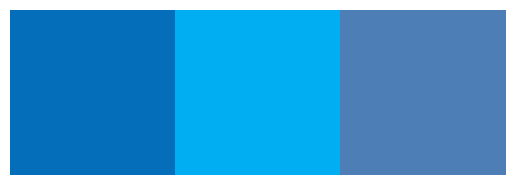

In [129]:
palette = [(5,110,187),(2,174,242),(77,126,182)]
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.show()

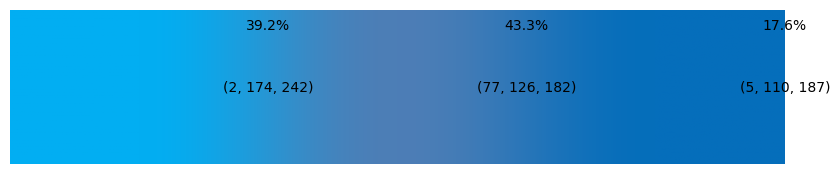

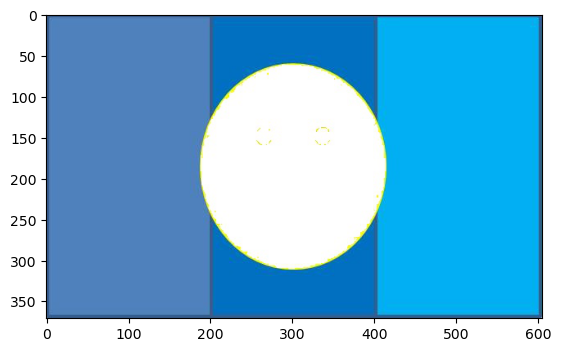

In [149]:
# calculate the normalization factor
norm_factor = df['occurence'].sum()

# create a numpy array with the RGB values
rgb_array = np.array([np.array(c) for c in df['c_code']]) / 255.0

# create a numpy array with the normalized percentage occurrences
percent_array = np.array(df['occurence']) / norm_factor

# calculate the sum of the normalized percentages
sum_percent = percent_array.sum()

# if the sum is not exactly equal to 1, scale the percentages
if abs(sum_percent - 1) > 0.0001:
    percent_array /= sum_percent

# create a color palette
palette = np.zeros((100, len(rgb_array), 3))
for i in range(len(rgb_array)):
    palette[:, i, :] = rgb_array[i]

# plot the color palette
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(palette, aspect='auto')
ax.axis('off')

# add text labels with the RGB values and their percentage occurrences
for i in range(len(rgb_array)):
    ax.text(i + 0.5, 50, str(df['c_code'][i]), ha='center', va='center', fontsize=10)
    ax.text(i + 0.5, 10, str(round(percent_array[i] * 100, 1)) + '%', ha='center', va='center', fontsize=10)

plt.show()


image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)


In [150]:
import extcolors

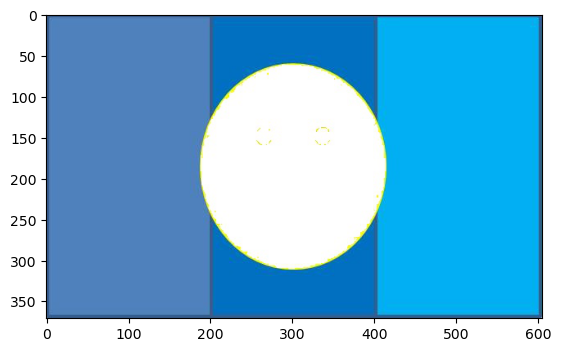

In [151]:
image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'

image = mpimg.imread(image_path)
plt.imshow(image)

In [152]:
skip_ranges = [(200, 255), (200, 255), (200, 255)]
colors_x = extcolors.extract_from_path(image_path, tolerance=4, limit=4) #클러스터링에서 맨 처음 함수랑 비슷한듯
filtered_colors = [color for color in colors_x[0] if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
filtered_colors

[((79, 129, 188), 68786), ((2, 175, 243), 64722), ((1, 112, 193), 23260)]

In [186]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    df = pd.DataFrame(zip(df_rgb, df_percent), columns = ['c_code!','occurence!'])
    return df

In [187]:
df_color = color_to_df(filtered_colors)
df_color

,c_code!,occurence!
0,"(79, 129, 188)",68786
1,"(2, 175, 243)",64722
2,"(1, 112, 193)",23260


In [189]:
list_color = list(df_color['c_code!'])
list_precent = [int(i) for i in list(df_color['occurence!'])]

In [192]:
ret=np.array(list_color)
ret

array([[ 79, 129, 188],
       [  2, 175, 243],
       [  1, 112, 193]])

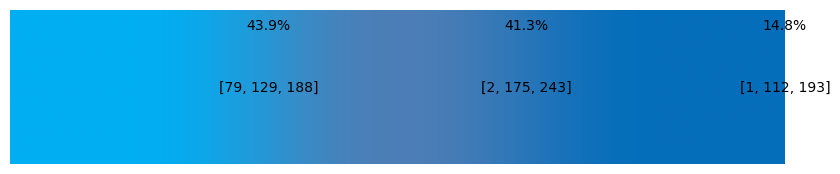

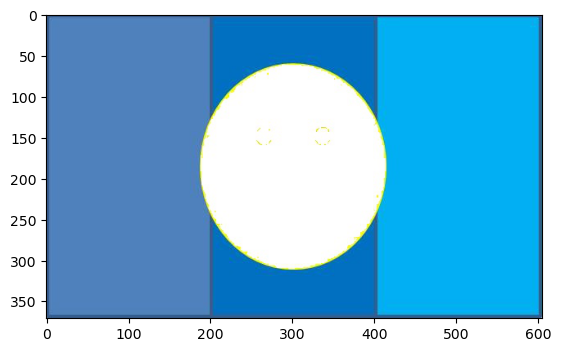

In [193]:
list_color = np.array([np.array(c) for c in df['c_code']]) / 255.0
# create a color palette
palette = np.zeros((100, len(list_color), 3))
for i in range(len(list_color)):
    palette[:, i, :] = list_color[i]

# plot the color palette
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(palette, aspect='auto')
ax.axis('off')

# add text labels with the RGB values and their percentage occurrences
for i in range(len(list_color)):
    ax.text(i + 0.5, 50, list(df_color['c_code!'][i]), ha='center', va='center', fontsize=10)
    ax.text(i + 0.5, 10, str(round(list_precent[i]/(68786+64722+23260)*100, 1)) + '%', ha='center', va='center', fontsize=10)

plt.show()


image_path = 'C:/Users/user/Desktop/color/test_revised.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)